In [1]:
%matplotlib inline
import os
import sys

import pandas as pd
import pandas_datareader.data as web
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from arch import arch_model

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import datetime
from datetime import datetime, date

In [3]:
import pandas_datareader as pdr

Function of getting stock data from yahoo financial site.

In [4]:
def get_stock_data(ticker, start, end):
    data=pdr.DataReader(ticker, 'yahoo',start,end)
    data.insert(0,'Ticker',ticker)
    return data

In [5]:
def get_data_multiple(tickers, start, end):
    stocks=dict()
    for ticker in tickers:
        s=get_stock_data(ticker, start,end)
        stocks[ticker]=s
    return stocks

Accoring to : 
https://www.cnbc.com/2018/12/31/2018-stocks-sp-500-best-and-worst-performers-in-a-volatile-year.html

next ones are 10 biggest performance stocks in 2018.

* Advanced Micro Devices (AMD)
* ABIOMED (ABMD)
* Fortinet (FTNT)
* Advance Auto Parts (AAP)
* TripAdvisor (TRIP)
* Chipotle Mexican Grill (CMG)
* Red Hat (RHT)
* Keysight Technologies (KEYS)
* O'Reilly Automotive (ORLY)
* Boston Scientific (BSX)

In [6]:
raw=get_data_multiple(['AMD','ABMD','FTNT','AAP','TRIP','CMG','RHT','KEYS','ORLY','BSX'],'2015-1-1','2018-12-31')

In [7]:
def pivot_to_columns (raw, column):
    items=[]
    
    for key in raw :
        data=raw[key]
        
        subset=data[['Ticker', column]]
        
        items.append(subset)
        
    combined=pd.concat(items)
    ri=combined.reset_index()
    
    return ri.pivot('Date','Ticker', column)

In [8]:
data_close=pivot_to_columns(raw,'Close')

In [9]:
data_close.head()

Ticker,AAP,ABMD,AMD,BSX,CMG,FTNT,KEYS,ORLY,RHT,TRIP
Date,,,,,,,,,,
2015-01-02,158.559998,37.310001,2.67,13.22,678.400024,30.790001,33.419998,192.110001,68.989998,74.589996
2015-01-05,156.470001,37.070000,2.66,13.81,667.690002,30.520000,33.540001,188.720001,68.089996,72.730003
2015-01-06,156.360001,36.130001,2.63,13.70,664.380005,29.950001,33.610001,188.080002,67.500000,70.010002
2015-01-07,159.720001,37.279999,2.58,14.03,694.260010,30.379999,33.880001,189.789993,68.800003,70.839996
2015-01-08,161.119995,38.959999,2.61,14.59,719.989990,31.209999,34.119999,193.240005,69.029999,73.260002


I took all close values for each stock!

Distribution of Price for each stock:

Plotting for column AAP


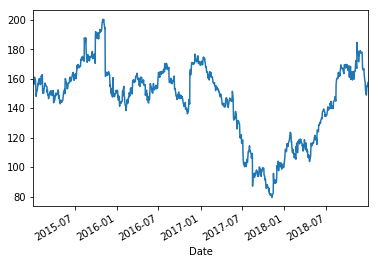

Plotting for column ABMD


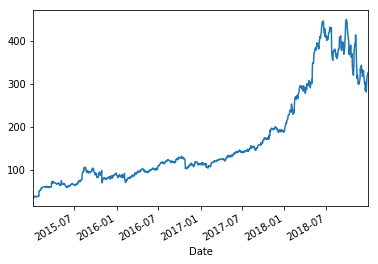

Plotting for column AMD


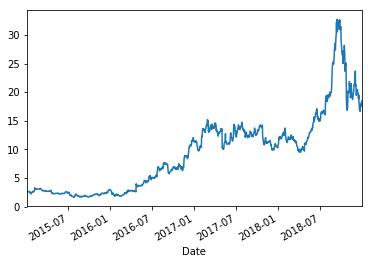

Plotting for column BSX


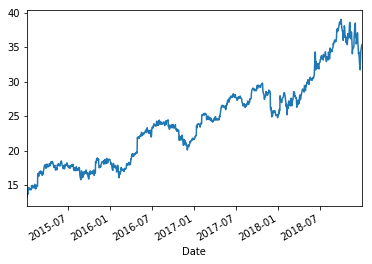

Plotting for column CMG


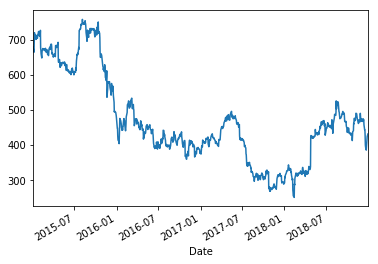

Plotting for column FTNT


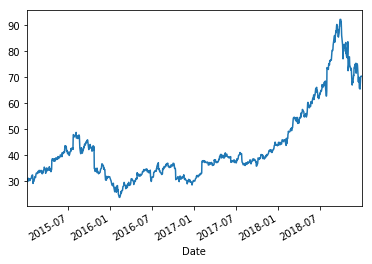

Plotting for column KEYS


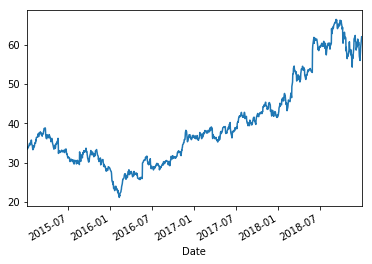

Plotting for column ORLY


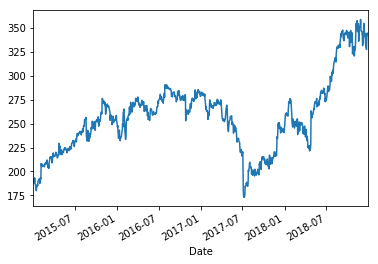

Plotting for column RHT


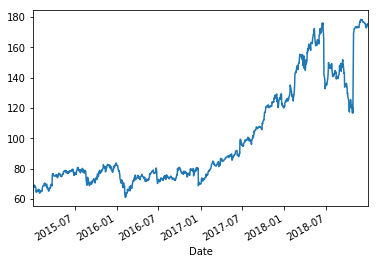

Plotting for column TRIP


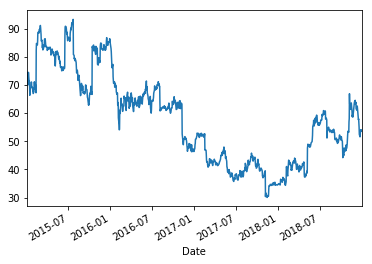

In [10]:
for col in data_close.columns:
    plot = data_close[col].plot()
    print("Plotting for column {}".format(col))
    plt.show()

## Use resampling to compare mean and median weekly, monthly and quarterly returns for these 10 firms

In [11]:
def returns (x): return x/x.shift(1)-1

In [12]:
data_mean_week=data_close.resample('W', how='mean')

In [13]:
data_mean_week.head()

Ticker,AAP,ABMD,AMD,BSX,CMG,FTNT,KEYS,ORLY,RHT,TRIP
Date,,,,,,,,,,
2015-01-04,158.559998,37.310001,2.6700,13.2200,678.400024,30.790001,33.419998,192.110001,68.989998,74.589996
2015-01-11,158.794000,37.570000,2.6220,14.1560,692.118005,30.626000,33.822000,189.528000,68.431999,72.274001
2015-01-18,152.307999,38.130000,2.5660,14.4700,709.478003,30.770000,34.702000,182.732004,66.200002,69.444000
2015-01-25,154.582500,38.525000,2.4025,14.6225,709.200012,31.397501,35.327499,187.697502,65.480000,69.869999
2015-02-01,159.363998,46.426000,2.6240,14.7900,716.224011,31.084000,33.694000,190.706000,65.110001,68.272000


In [14]:
data_mean_week_returns=returns(data_mean_week).ffill()

In [15]:
data_mean_week_returns.head()

Ticker,AAP,ABMD,AMD,BSX,CMG,FTNT,KEYS,ORLY,RHT,TRIP
Date,,,,,,,,,,
2015-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-11,0.001476,0.006969,-0.017978,0.070802,0.020221,-0.005326,0.012029,-0.013440,-0.008088,-0.031050
2015-01-18,-0.040845,0.014906,-0.021358,0.022181,0.025082,0.004702,0.026019,-0.035857,-0.032616,-0.039157
2015-01-25,0.014934,0.010359,-0.063718,0.010539,-0.000392,0.020393,0.018025,0.027174,-0.010876,0.006134
2015-02-01,0.030932,0.205088,0.092196,0.011455,0.009904,-0.009985,-0.046239,0.016028,-0.005651,-0.022871


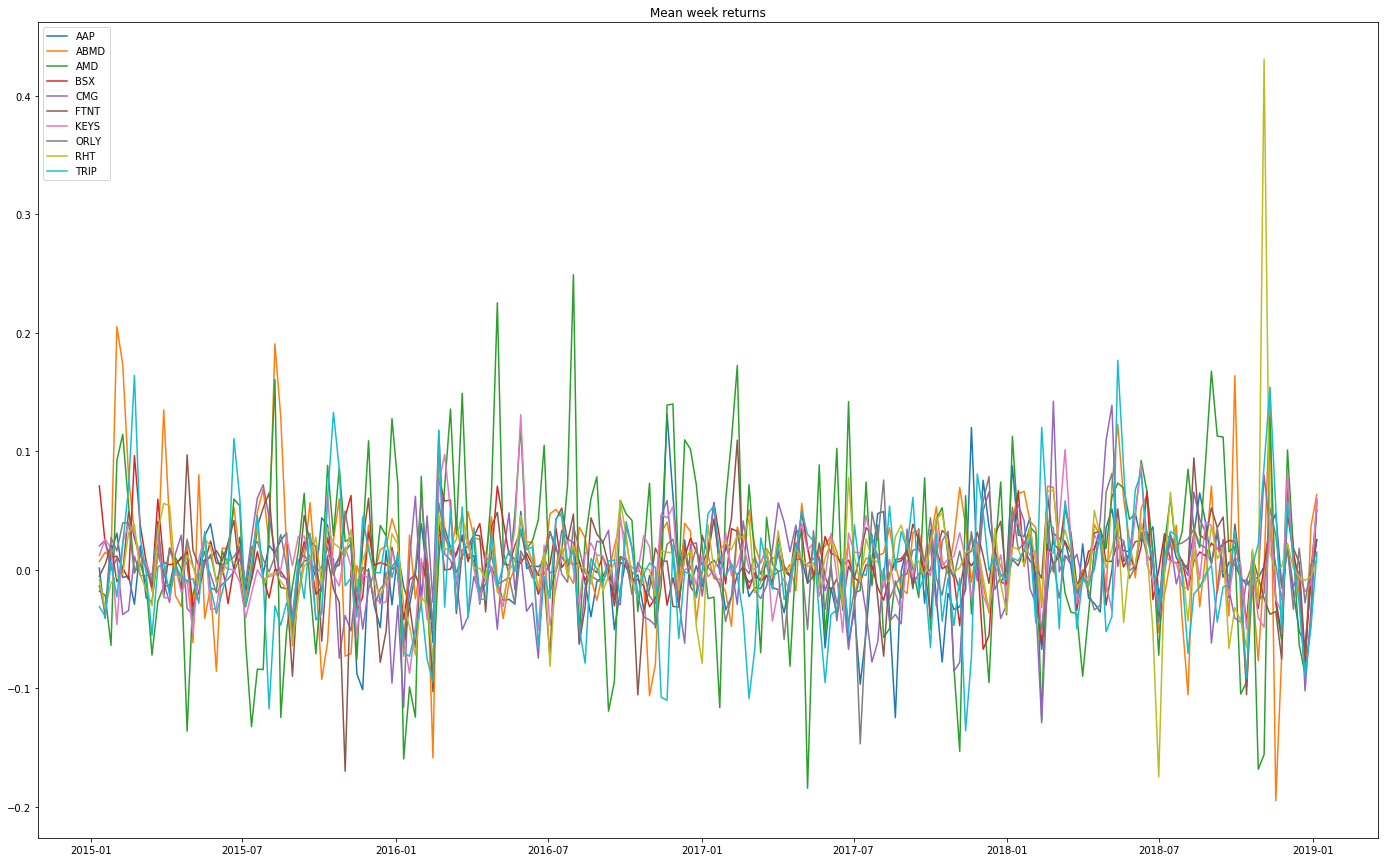

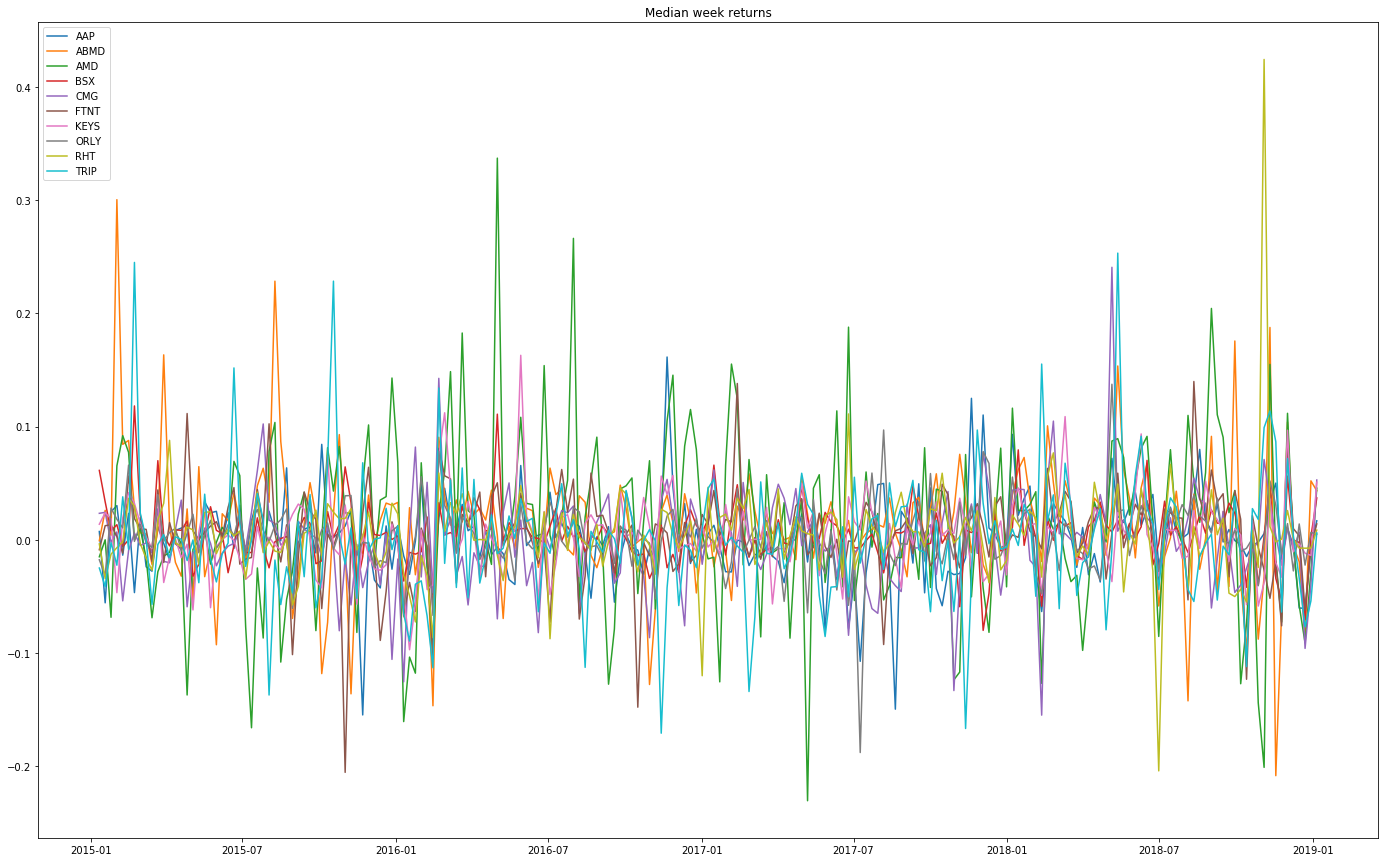

In [25]:
data_med_week=data_close.resample('W', how='median')
data_med_week_returns=returns(data_med_week).ffill()

plt.figure(figsize=(24, 15))
plt.plot(data_mean_week_returns)
plt.title('Mean week returns')
plt.legend(data_mean_week.columns, loc='upper left')


plt.figure(figsize=(24, 15))
plt.title('Median week returns')
plt.plot(data_med_week_returns)
plt.legend(data_med_week.columns, loc='upper left')

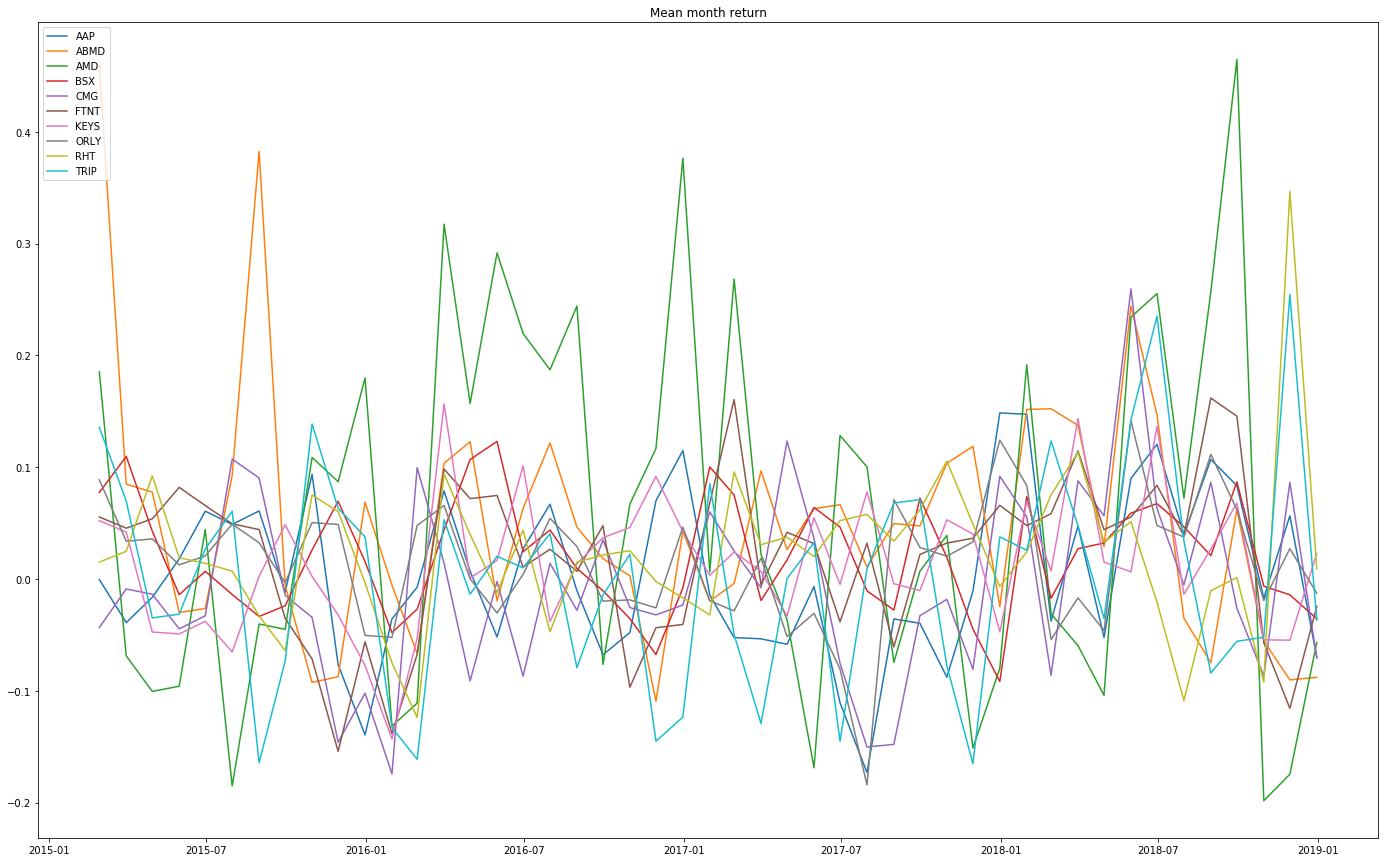

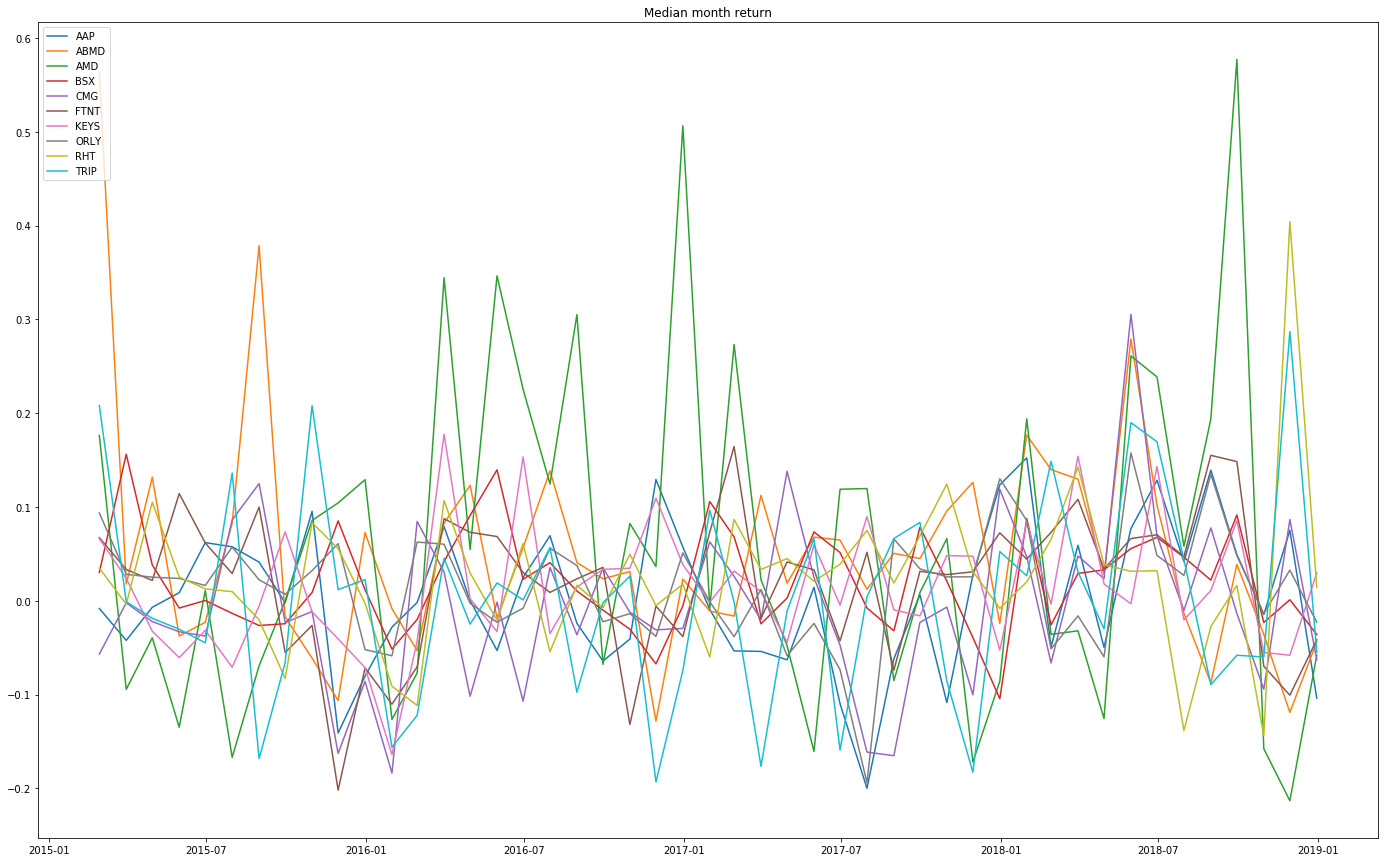

In [26]:
data_mean_month=data_close.resample('M', how='mean')
data_mean_month_returns=returns(data_mean_month).ffill()

data_med_month=data_close.resample('M', how='median')
data_med_month_returns=returns(data_med_month).ffill()


plt.figure(figsize=(24, 15))
plt.plot(data_mean_month_returns)
plt.title('Mean month return')
plt.legend(data_mean_month.columns, loc='upper left')

plt.figure(figsize=(24, 15))
plt.plot(data_med_month_returns)
plt.title('Median month return')
plt.legend(data_med_month.columns, loc='upper left')

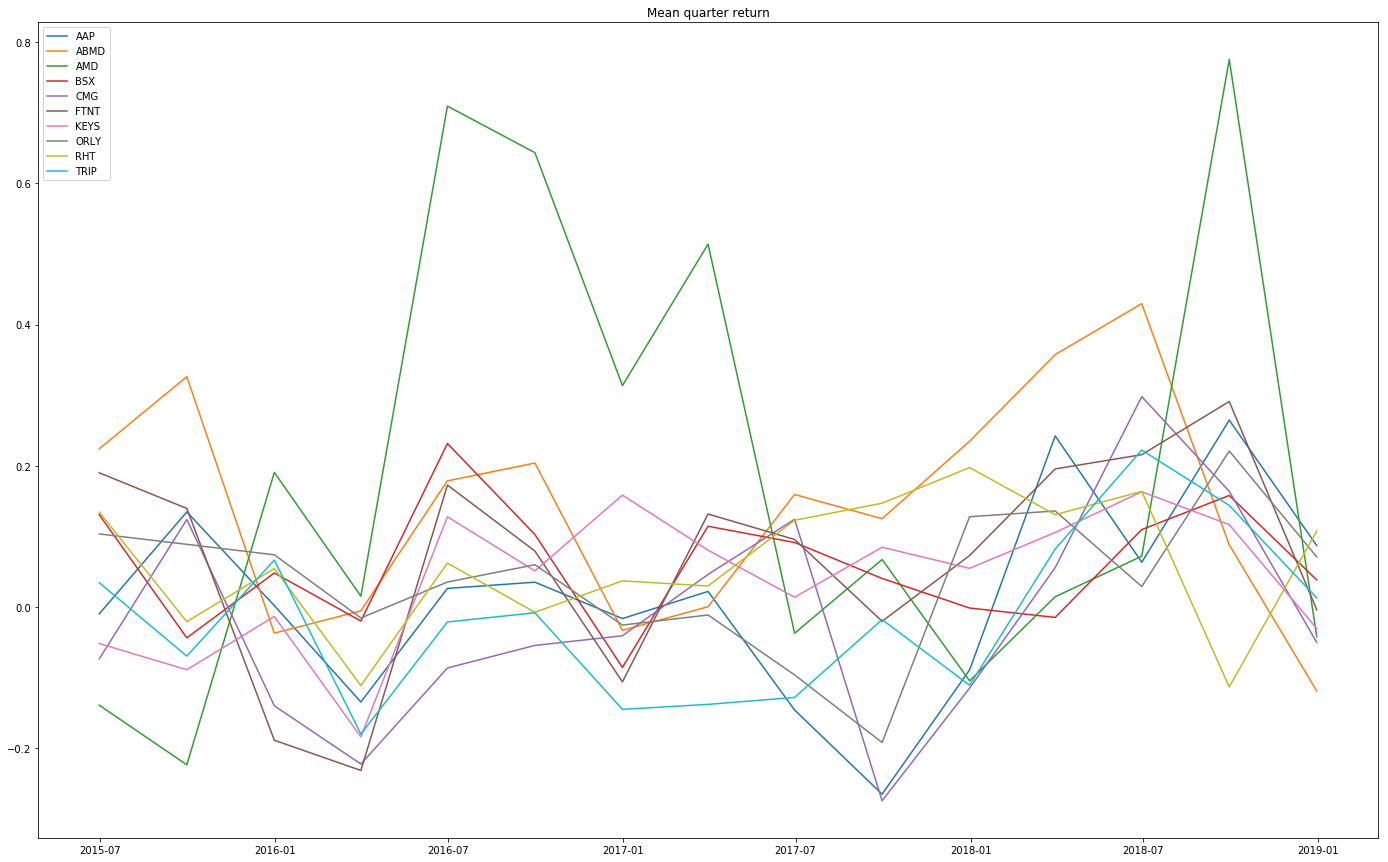

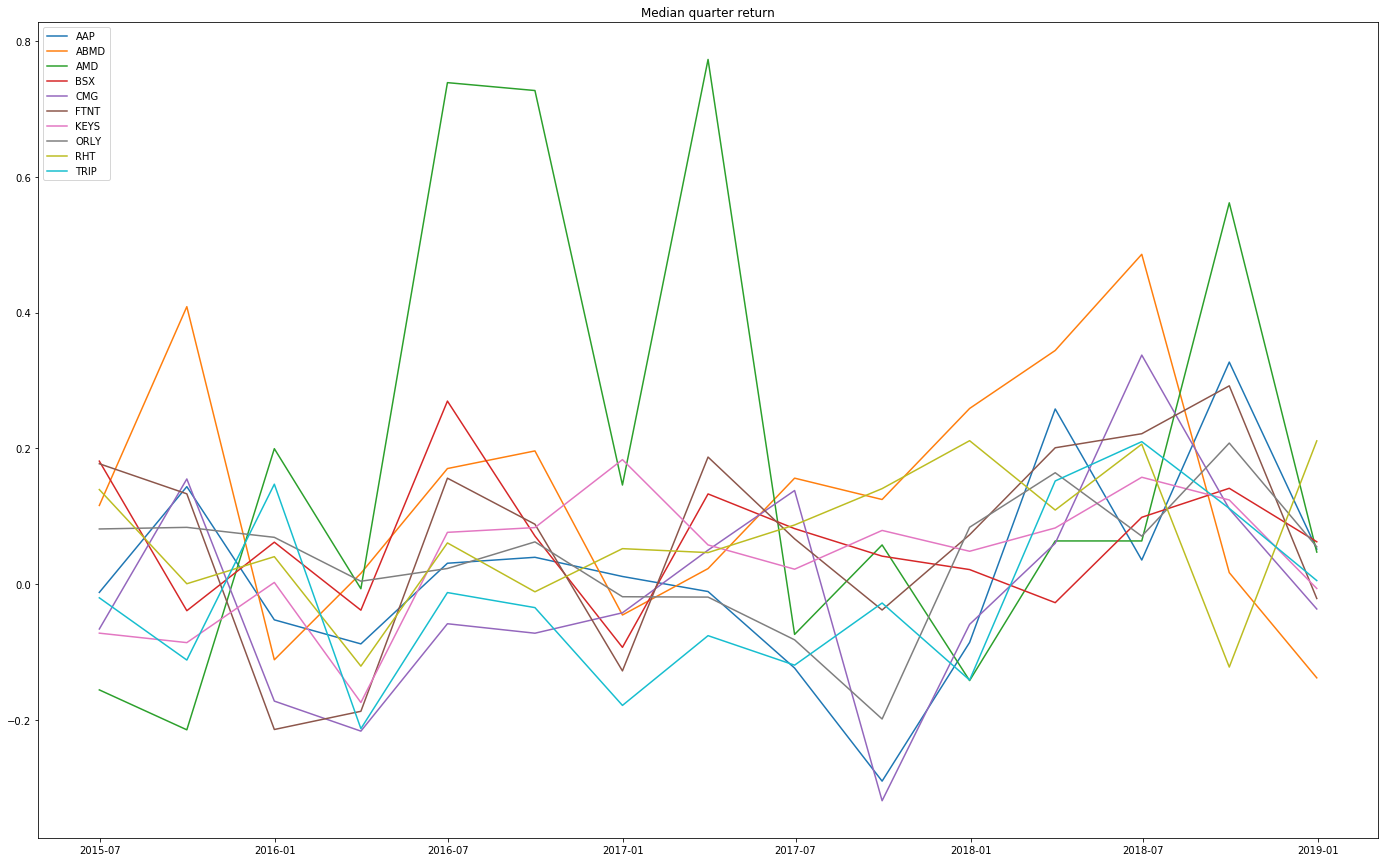

In [27]:
data_mean_q=data_close.resample('Q', how='mean')
data_mean_q_returns=returns(data_mean_q).ffill()

data_med_q=data_close.resample('Q', how='median')
data_med_q_returns=returns(data_med_q).ffill()

plt.figure(figsize=(24, 15))
plt.plot(data_mean_q_returns)
plt.title('Mean quarter return')
plt.legend(data_mean_q.columns, loc='upper left')

plt.figure(figsize=(24, 15))
plt.plot(data_med_q_returns)
plt.title('Median quarter return')
plt.legend(data_med_q.columns, loc='upper left')

## Determine two most correlated pair of quotes (i.e. firms) in your set

## Correlation of stocks based on the daily percentage change of the closing price

In [28]:
daily_pc=data_close/data_close.shift(1)-1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B0428888D0>,
      dtype=object)

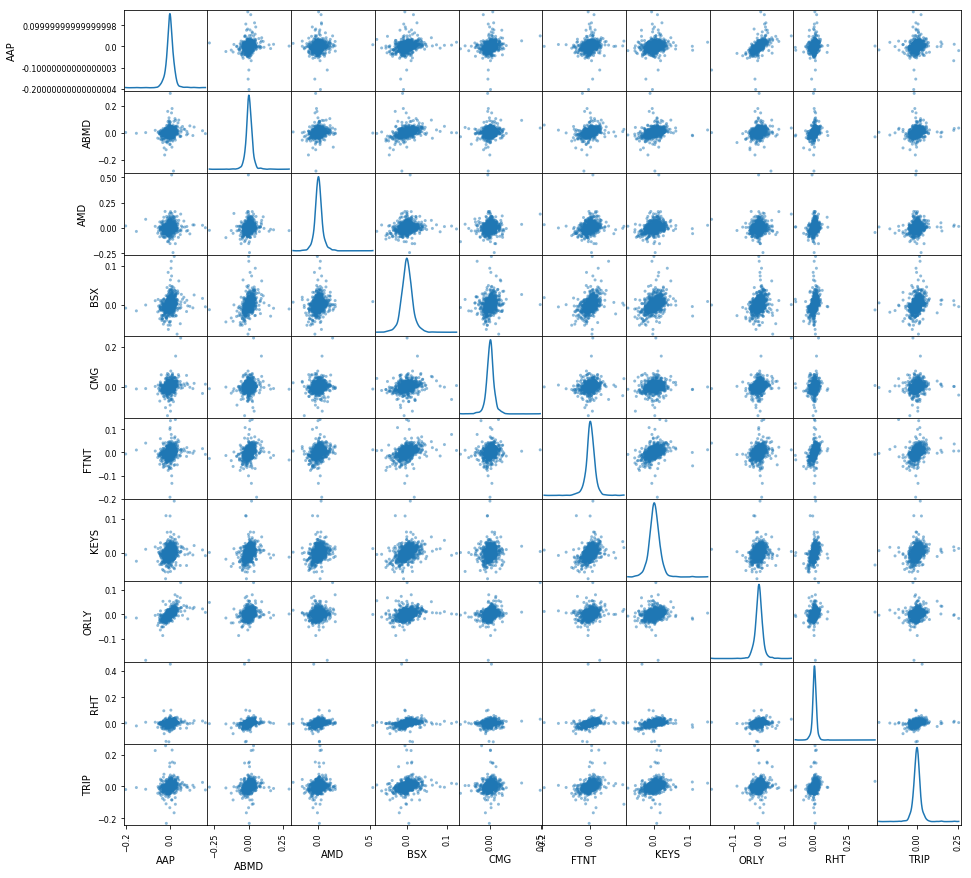

In [29]:
from pandas.plotting import scatter_matrix

scatter_matrix(daily_pc, diagonal='kde', figsize=(15,15))

In [30]:
corr_daily=pd.DataFrame(daily_pc.corr())

In [31]:
corr_daily.head(10)

Ticker,AAP,ABMD,AMD,BSX,CMG,FTNT,KEYS,ORLY,RHT,TRIP
Ticker,,,,,,,,,,
AAP,1.000000,0.148240,0.079335,0.216442,0.206954,0.157884,0.167305,0.574139,0.130248,0.125864
ABMD,0.148240,1.000000,0.178108,0.344446,0.147180,0.251885,0.276760,0.173496,0.218906,0.188191
AMD,0.079335,0.178108,1.000000,0.209594,0.109230,0.226141,0.276034,0.096728,0.160280,0.144158
BSX,0.216442,0.344446,0.209594,1.000000,0.180793,0.375392,0.350866,0.244751,0.233909,0.246836
CMG,0.206954,0.147180,0.109230,0.180793,1.000000,0.149669,0.149199,0.289681,0.113039,0.113318
FTNT,0.157884,0.251885,0.226141,0.375392,0.149669,1.000000,0.362179,0.206109,0.316568,0.275490
KEYS,0.167305,0.276760,0.276034,0.350866,0.149199,0.362179,1.000000,0.192565,0.223789,0.257997
ORLY,0.574139,0.173496,0.096728,0.244751,0.289681,0.206109,0.192565,1.000000,0.183697,0.183965
RHT,0.130248,0.218906,0.160280,0.233909,0.113039,0.316568,0.223789,0.183697,1.000000,0.218551


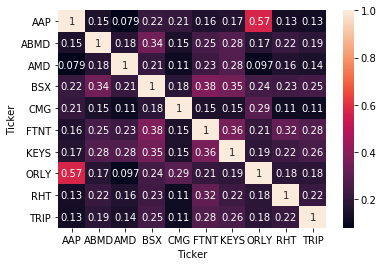

In [33]:
import seaborn as sns
sns.heatmap(daily_pc.corr(), annot=True)

In this case we have greatest correlation between Advance Auto Parts (AAP) and O'Reilly Automotive (ORLY)!

## Determining risk relative to expected returns for your set of quotes and see if you can draw any conclusion on expected return vs risk

Simple daily percentage change is the percentage change in the value of a stock over a single day of trading.

In [34]:
daily_pc.fillna(0,inplace=True)

In [35]:
daily_pc.columns

Index(['AAP', 'ABMD', 'AMD', 'BSX', 'CMG', 'FTNT', 'KEYS', 'ORLY', 'RHT',
       'TRIP'],
      dtype='object', name='Ticker')

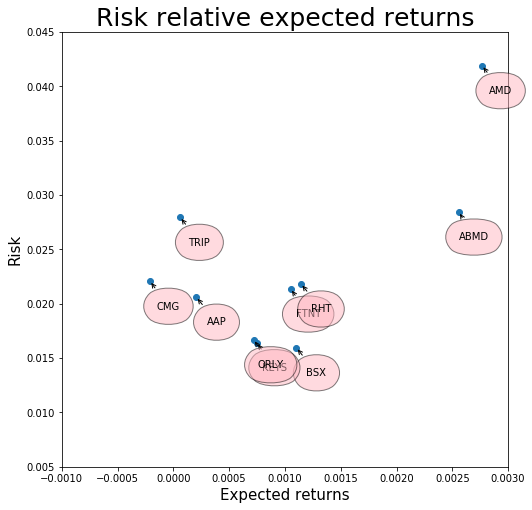

In [36]:
plt.scatter(daily_pc.mean(), daily_pc.std())
plt.title('Risk relative expected returns', fontsize=25)
plt.xlabel('Expected returns', fontsize=15)
plt.ylabel('Risk', fontsize=15)

for label, x, y in zip(daily_pc.columns,
                      daily_pc.mean(),
                      daily_pc.std()):
    plt.annotate( label,
                xy=(x,y), xytext= (30,-30),
                textcoords= 'offset points', ha='right',
                va='bottom',
                bbox=dict(boxstyle ='round4,pad=1.5',
                         fc='lightpink',
                         alpha=0.5),
                arrowprops=dict(arrowstyle='->',
                               connectionstyle='arc3,rad=0'))
# setting scale and range for good presentation
plt.xlim(-0.001,0.003)
plt.ylim(0.005,0.045)

plt.gcf().set_size_inches(8,8)

From this we can see that
* Stocks (AMD, TRIP, and ABMD) have the highest risk but also have the highest returns.
* stocks like BSX and KEYS have the lowest risk but are also among the lowest returns as a group.

# Whe can check their volatility

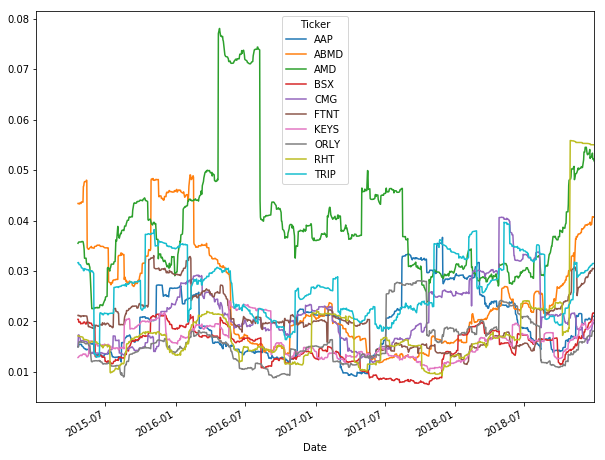

In [37]:
min_periods=75

vol=daily_pc.rolling(window=min_periods).std()

vol.plot(figsize=(10,8))

We can actualy see that stocks AMD, TRIP and ABMD have great changes which means this stocks are at high risk , that actually is related to our 'Risk relative expected returns' graph from before.